In [144]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [145]:
X,y = make_moons(n_samples=100,noise=0.2)

In [146]:
X.shape

(100, 2)

In [147]:
y.shape

(100,)

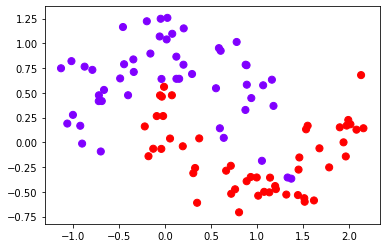

In [148]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
ax = plt.gca()

In [149]:
xlim = ax.get_xlim()
ylim = ax.get_ylim()

In [150]:
step_num = 50
axis_x = np.linspace(xlim[0],xlim[1],step_num)
axis_y = np.linspace(ylim[0],xlim[1],step_num)
axis_x,axis_y = np.meshgrid(axis_x,axis_y)

In [151]:
axis_x.shape

(50, 50)

In [152]:
xy = np.vstack([axis_x.ravel(),axis_y.ravel()]).T

In [153]:
xy.shape

(2500, 2)

In [154]:
#plt.scatter(xy[:,0],xy[:,1])

In [155]:
from sklearn.svm import SVC

In [156]:
svc = SVC()
svc.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [157]:
z = svc.decision_function(xy)

In [158]:
z.shape

(2500,)

In [159]:
z = z.reshape(axis_x.shape)

In [160]:
z.shape

(50, 50)

In [161]:
z_pcolor = np.where(z<0,-1,1)

In [162]:
axis_x.shape

(50, 50)

In [163]:
axis_y.shape

(50, 50)

(-0.8229097592423024, 1.3739800192213232)

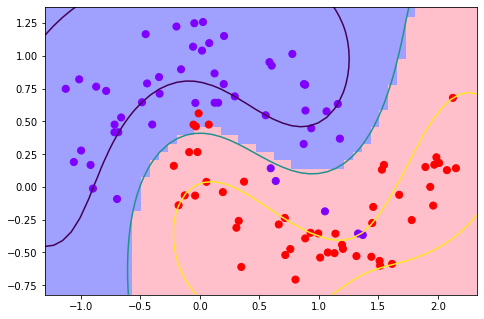

In [164]:
#plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
#ax = plt.gca()
#---上面这两个语句必须要再运行一遍，否则下面绘制不了图形
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
color_light = mpl.colors.ListedColormap(['#A0A0FF', 'pink'])
ax.contour(axis_x,axis_y,z,levels=[-1,0,1])
ax.pcolormesh(axis_x,axis_y,z_pcolor,cmap=color_light)
ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
ax.set_xlim(xlim)
ax.set_ylim(ylim)